# Hierarichal Algorithm on Creditcard Dataset

<b> Load Dataset

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [7]:
# Importing the dataset  
data = pd.read_csv(r"C:\Users\santhosh\Downloads\Credit Card Customer Data.csv")
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [8]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [9]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<b> Data Clean

In [29]:
data.drop(columns=['Sl_No'], inplace=True)

In [31]:
data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [33]:
data.duplicated().sum()

0

<b> Exploratory data Analysis

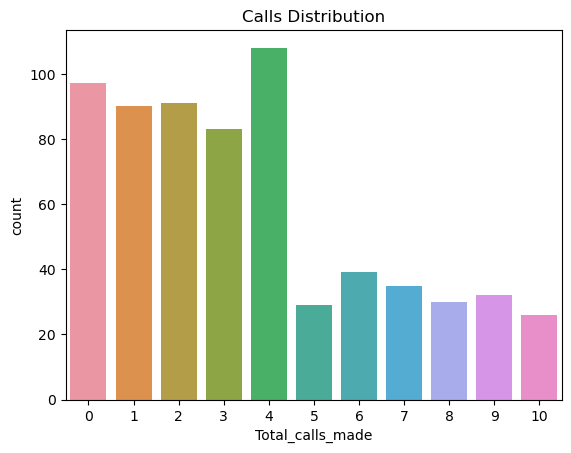

In [35]:
# Class distribution

sns.countplot(x='Total_calls_made', data=data)
plt.title('Calls Distribution')
plt.show()


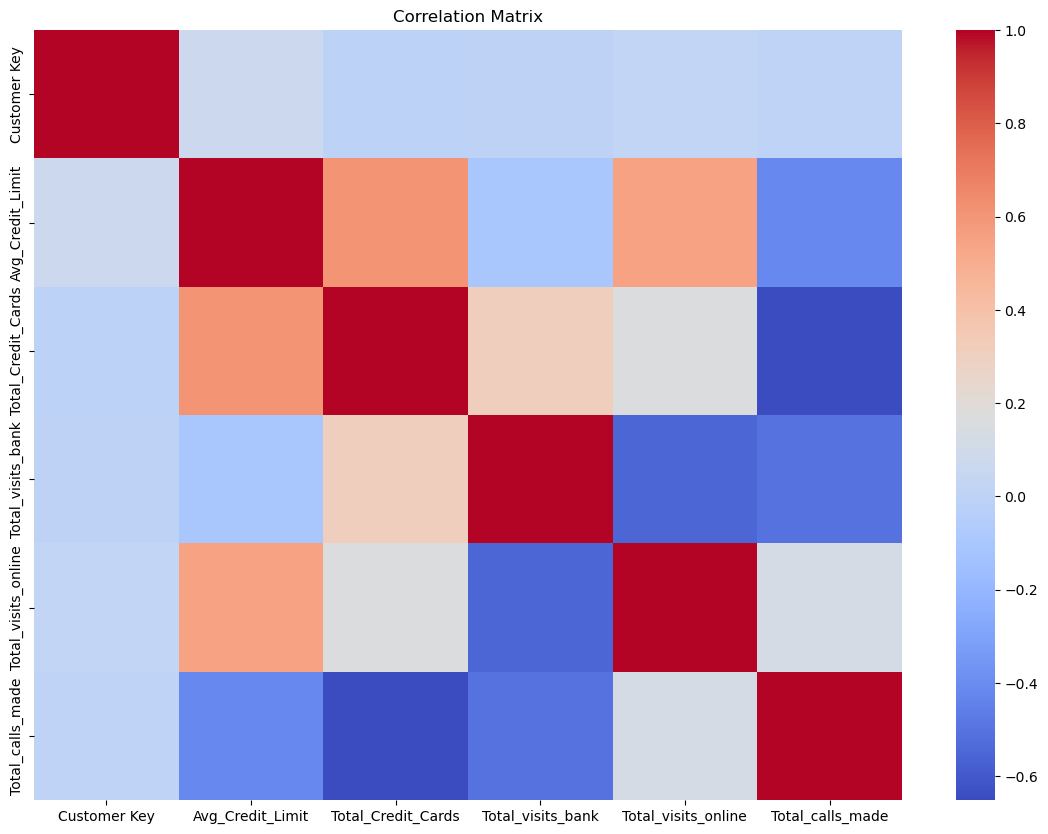

In [54]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


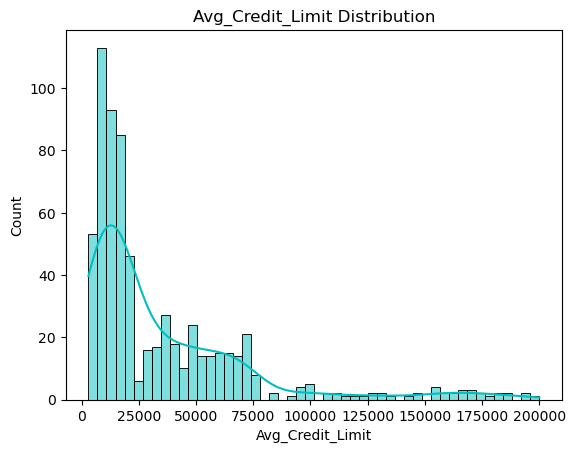

C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


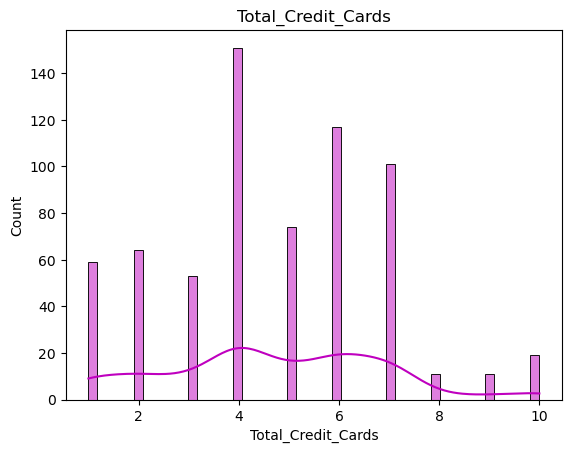

In [78]:
# Distribution of 'Amount'
sns.histplot(data['Avg_Credit_Limit'], bins=50, color='c', kde=True)
plt.title('Avg_Credit_Limit Distribution')
plt.show()

# Distribution of 'Time'
sns.histplot(data['Total_Credit_Cards'], bins=50, color='m', kde=True)
plt.title('Total_Credit_Cards')
plt.show()


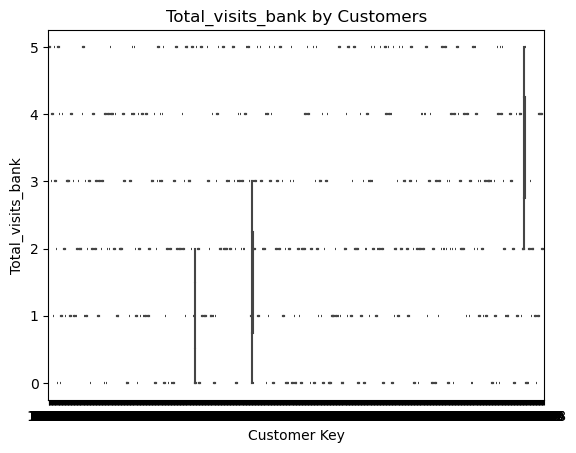

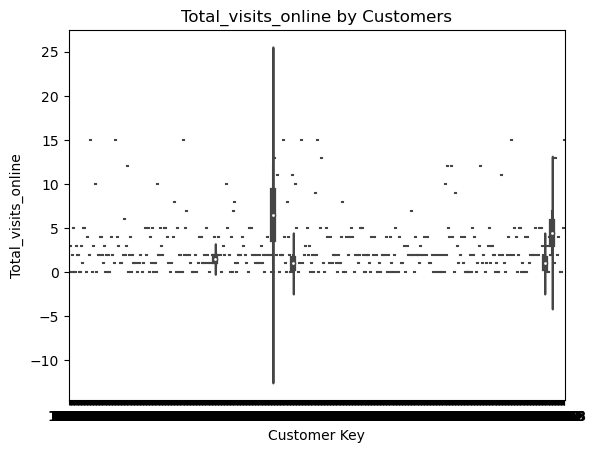

In [82]:
# Box plot for 'Total_visits_bank' vs 'Customers'
sns.boxplot(x='Customer Key', y='Total_visits_bank', data=data)
plt.title('Total_visits_bank by Customers')
plt.show()

# Violin plot for 'Total_visits_online' vs 'Customers'
sns.violinplot(x='Customer Key', y='Total_visits_online', data=data)
plt.title('Total_visits_online by Customers')
plt.show()


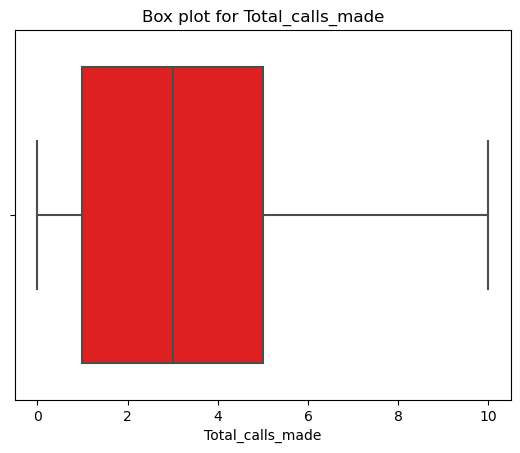

In [86]:
# Outlier detection for 'Amount'
sns.boxplot(x=data['Total_calls_made'], color='red')
plt.title('Box plot for Total_calls_made')
plt.show()

C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santhosh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

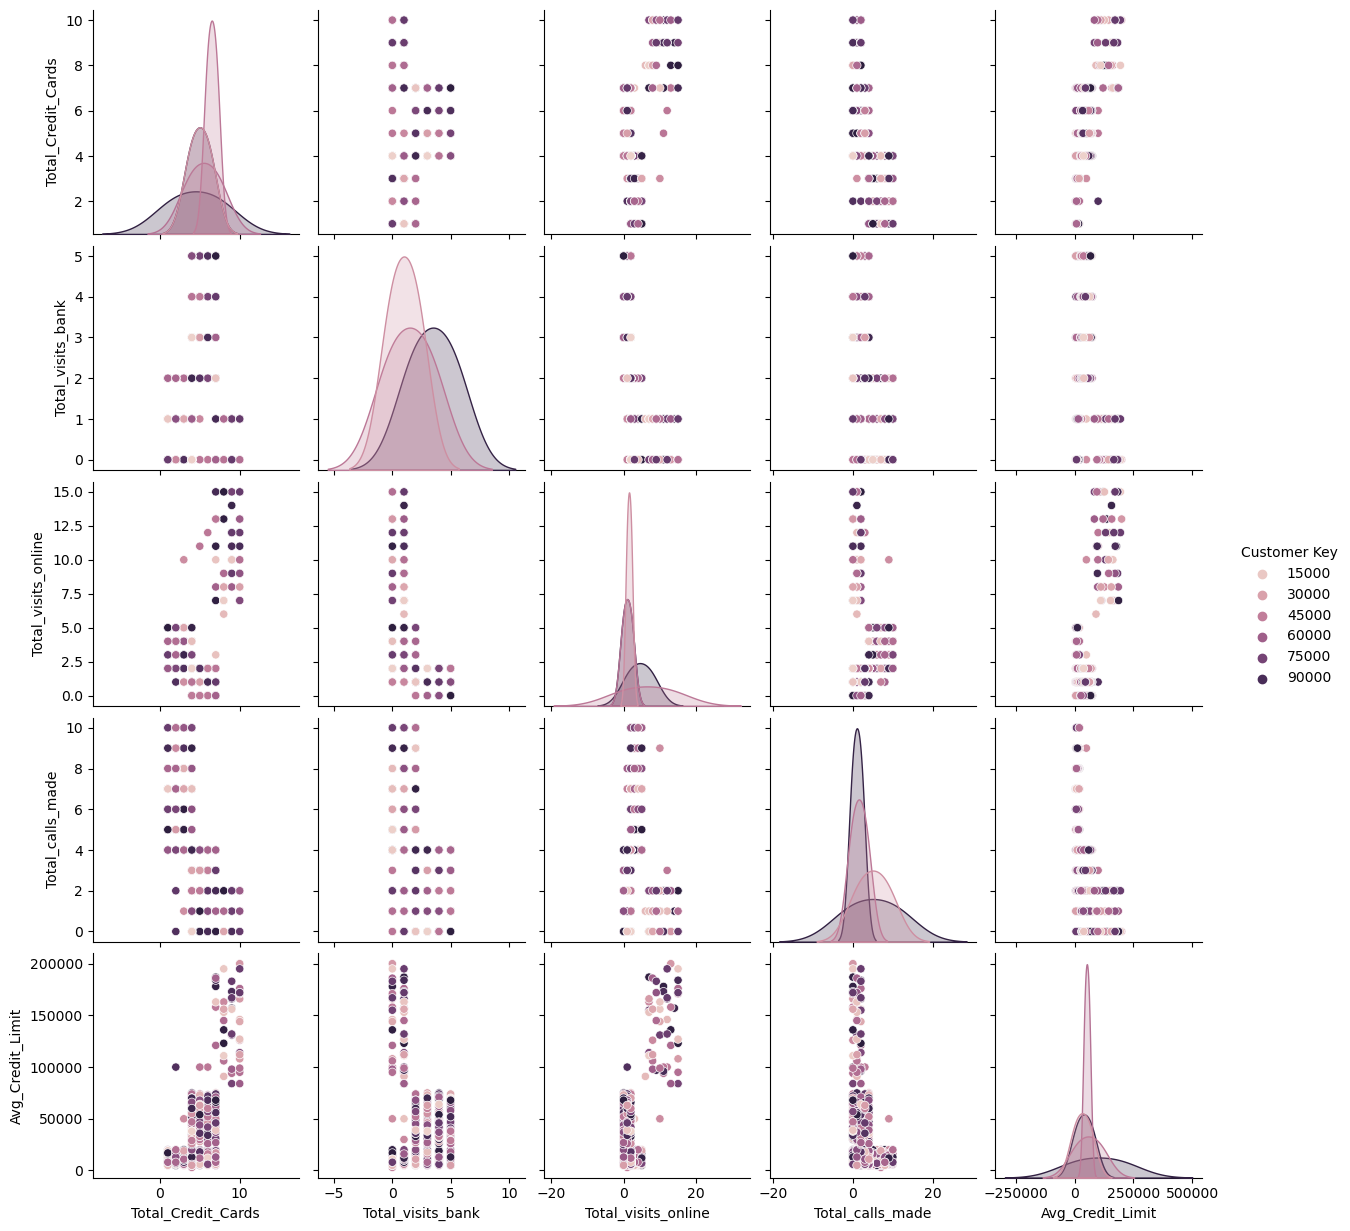

In [94]:
# Pair plot

sns.pairplot(data, hue='Customer Key', vars=['Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Avg_Credit_Limit'])
plt.show()


In [44]:
#Here we have extracted only 3 and 4 columns as we will use a 2D plot to see the clusters.
x = data.iloc[:, [1, 2]].values
x

array([[100000,      2],
       [ 50000,      3],
       [ 50000,      7],
       ...,
       [145000,      8],
       [172000,     10],
       [167000,      9]], dtype=int64)

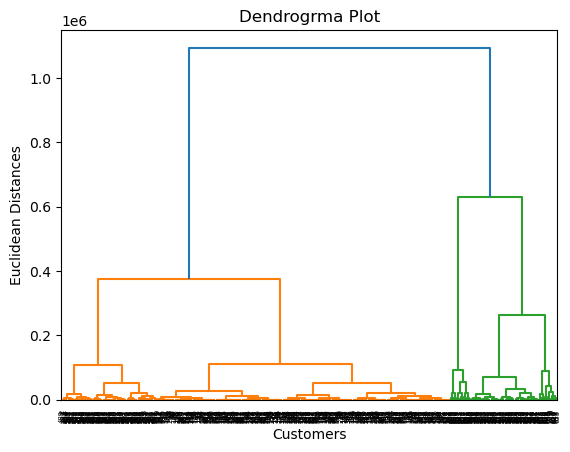

In [46]:
#Finding the optimal number of clusters using the dendrogram 

import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")
plt.show()

<b> Applying Algorithm

In [47]:
#training the hierarchical model on dataset 

from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

C:\Users\santhosh\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
y_pred

array([3, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<b> Visualize the Predicted values

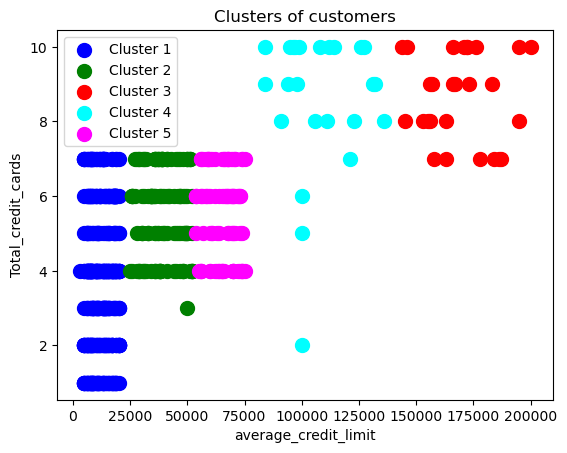

In [49]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('average_credit_limit')  
plt.ylabel('Total_credit_cards')  
plt.legend()  
plt.show()  